### Data analysis and a simple decision tree example using data from https://www.kaggle.com/uciml/zoo-animal-classification

### from Part-2 analysis, we know the gini index scores. Based on that we select following columns only.


In [1]:
import pandas as pd

Read the data file

In [2]:
zoo_df = pd.read_csv("data\Decision-Tree_Zoo-Data\zoo-animal-classification\zoo.csv")

Check if we are missing any data

In [3]:
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


animal_name is not useful in classification. remove it from data set

In [4]:
animal_names = zoo_df['animal_name'].to_list()
print(animal_names)
zoo_df = zoo_df.drop('animal_name', axis=1)

['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf', 'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam', 'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove', 'duck', 'elephant', 'flamingo', 'flea', 'frog', 'frog', 'fruitbat', 'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock', 'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly', 'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx', 'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum', 'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike', 'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise', 'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion', 'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer', 'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel', 'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise', 'tuatara', 'tuna', 'vampire', 'vole', 'vulture', 'wallaby', 'wasp', 'wolf', 'worm', 'wren']


In [5]:
for column in zoo_df.columns:
    zoo_df[column] = zoo_df[column].astype("category")

In [6]:
zoo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
hair          101 non-null category
feathers      101 non-null category
eggs          101 non-null category
milk          101 non-null category
airborne      101 non-null category
aquatic       101 non-null category
predator      101 non-null category
toothed       101 non-null category
backbone      101 non-null category
breathes      101 non-null category
venomous      101 non-null category
fins          101 non-null category
legs          101 non-null category
tail          101 non-null category
domestic      101 non-null category
catsize       101 non-null category
class_type    101 non-null category
dtypes: category(17)
memory usage: 3.8 KB


A glance over the data

In [7]:
zoo_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [8]:
zoo_df[['catsize', 'class_type']].groupby('catsize').count()

,class_type
catsize,
0,57
1,44


## Split the data into training and testing sets

In [9]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

In [10]:
# copy X columns
columns = ["legs", "feathers", "milk", "backbone", "fins", "tail", "toothed", "eggs"]
X = zoo_df[columns]
# copy Y column (class)
y = zoo_df['class_type']

In [11]:
#oversampler = SMOTE(k_neighbors=1)
oversampler = RandomOverSampler()
X, y = oversampler.fit_resample(X, y)

In [12]:
# split the data (70-30 split)
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size = 0.30, stratify = y)

In [13]:
train_X

array([[2, 1, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [4, 0, 1, ..., 1, 1, 0],
       [6, 0, 0, ..., 0, 0, 1],
       [4, 0, 1, ..., 1, 1, 0]], dtype=object)

Build the machine learning model

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
model = DecisionTreeClassifier(criterion="gini", max_features=1)
model.fit(train_X, train_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
print("Impurity measures ", model.tree_.impurity)

Impurity measures  [0.8571     0.83328204 0.44459834 0.         0.35265306 0.39669421
 0.         0.         0.         0.80061055 0.6634349  0.49931413
 0.         0.40499671 0.32       0.         0.         0.59402893
 0.57971939 0.34567901 0.         0.48       0.         0.48
 0.         0.         0.        ]


Predict the class of test data

In [17]:
y_predicted = model.predict(test_X)

How good is the model?
check accuracy

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
print(accuracy_score(test_Y, y_predicted))

0.9425287356321839


Build confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
c_matrix = confusion_matrix(test_Y, y_predicted)
print(c_matrix)

[[13  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0]
 [ 0  0 10  0  2  0  0]
 [ 0  0  0 12  0  0  0]
 [ 0  0  0  0 13  0  0]
 [ 0  0  0  0  0 13  0]
 [ 0  0  0  0  0  3  9]]


In [22]:
from collections import Counter

In [23]:
print(Counter(test_Y))

Counter({6: 13, 5: 13, 1: 13, 7: 12, 4: 12, 3: 12, 2: 12})


In [24]:
print(Counter(y_predicted))

Counter({6: 16, 5: 15, 1: 13, 4: 12, 2: 12, 3: 10, 7: 9})


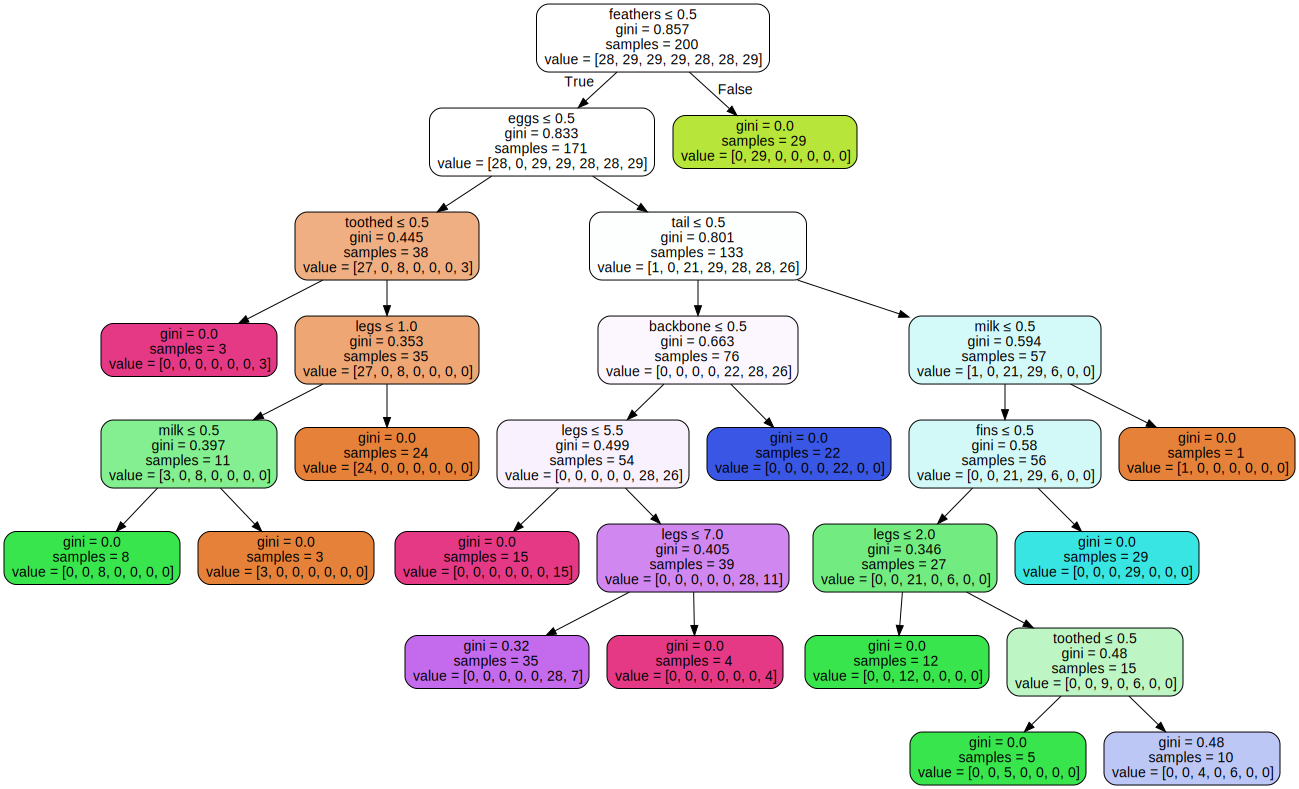

In [25]:
# plot the tree
# for graphing the tree
import graphviz as gv
from sklearn import tree

dot_data = tree.export_graphviz(model, out_file=None, filled=True, rounded = True, special_characters = True
                               , feature_names = columns)
graph = gv.Source(dot_data)
graph

In [26]:
Counter(zoo_df['legs'])

Counter({4: 38, 0: 23, 2: 27, 6: 10, 8: 2, 5: 1})